### Importación de datos



In [3]:
!pip install folium
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap



url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación

Se analizara la facturacion por cada tienda en baso a los datos dados.



In [4]:
# Facturación por tienda
facturacion_tienda1 = tienda1['Precio'].sum()
facturacion_tienda2 = tienda2['Precio'].sum()
facturacion_tienda3 = tienda3['Precio'].sum()
facturacion_tienda4 = tienda4['Precio'].sum()

# Mostrar resultados
print(f"Tienda 1 facturó: ${facturacion_tienda1:,.2f}")
print(f"Tienda 2 facturó: ${facturacion_tienda2:,.2f}")
print(f"Tienda 3 facturó: ${facturacion_tienda3:,.2f}")
print(f"Tienda 4 facturó: ${facturacion_tienda4:,.2f}")

# Crear un diccionario con totales
facturaciones = {
    'Tienda 1': facturacion_tienda1,
    'Tienda 2': facturacion_tienda2,
    'Tienda 3': facturacion_tienda3,
    'Tienda 4': facturacion_tienda4
}

# Buscar la tienda con mayor facturación
tienda_mayor = max(facturaciones, key=facturaciones.get)
mayor_valor = facturaciones[tienda_mayor]

print(f"\nLa tienda que más facturó fue: {tienda_mayor} con ${mayor_valor:,.2f}")
facturacion_tienda3 = tienda3['Precio'].sum()
facturacion_tienda4 = tienda4['Precio'].sum()

# Mostrar resultados
print(f"Tienda 1 facturó: ${facturacion_tienda1:,.2f}")
print(f"Tienda 2 facturó: ${facturacion_tienda2:,.2f}")
print(f"Tienda 3 facturó: ${facturacion_tienda3:,.2f}")
print(f"Tienda 4 facturó: ${facturacion_tienda4:,.2f}")

# Crear un diccionario con los totales
facturaciones = {
    'Tienda 1': facturacion_tienda1,
    'Tienda 2': facturacion_tienda2,
    'Tienda 3': facturacion_tienda3,
    'Tienda 4': facturacion_tienda4
}

# Buscar la tienda con mayor facturación
tienda_mayor = max(facturaciones, key=facturaciones.get)
mayor_valor = facturaciones[tienda_mayor]

print(f"\nLa tienda que más facturó fue: {tienda_mayor} con ${mayor_valor:,.2f}")


Tienda 1 facturó: $1,150,880,400.00
Tienda 2 facturó: $1,116,343,500.00
Tienda 3 facturó: $1,098,019,600.00
Tienda 4 facturó: $1,038,375,700.00

La tienda que más facturó fue: Tienda 1 con $1,150,880,400.00
Tienda 1 facturó: $1,150,880,400.00
Tienda 2 facturó: $1,116,343,500.00
Tienda 3 facturó: $1,098,019,600.00
Tienda 4 facturó: $1,038,375,700.00

La tienda que más facturó fue: Tienda 1 con $1,150,880,400.00


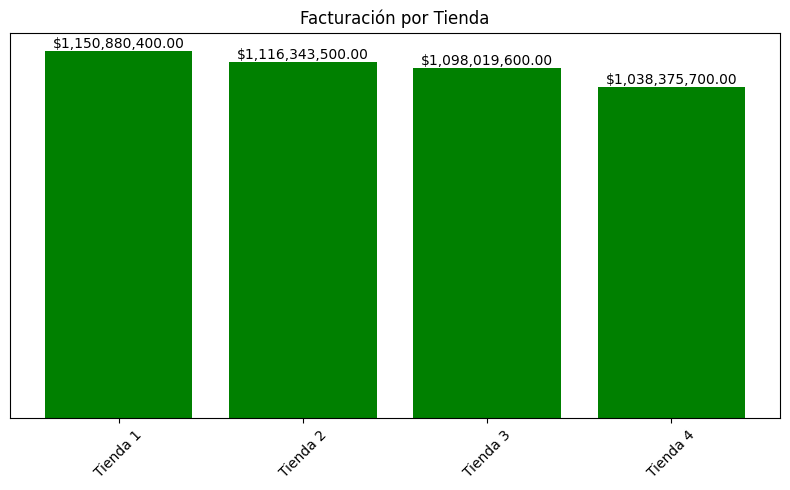

In [5]:
tiendas = list(facturaciones.keys()) #Valores eje X
valores_facturaciones = list(facturaciones.values()) #Valores eje Y

#Creación gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(tiendas, valores_facturaciones, color='green')

#Se anade titulo
plt.title('Facturación por Tienda')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Para mostras los valores encima de las barras
for i, valor in enumerate(valores_facturaciones):
    plt.text(i, valor, f'${valor:,.2f}', ha='center', va='bottom')

#Para eliminar los valores del eje Y
plt.yticks([])


plt.tight_layout()
plt.show()

Podemos observar en el gráfico que la Tienda 1, cuenta con la facturción más alta. Sin embargo, no hay mucha diferencia en el total de las facturaciones con respecto a las demás tiendas.

# 2. Ventas por categoría

In [6]:

# Diccionario con las tiendas
tiendas = {'Tienda 1': tienda1,
           'Tienda 2': tienda2,
           'Tienda 3': tienda3,
           'Tienda 4': tienda4}

# Facturación por categoría en cada tienda con formato
for nombre, df in tiendas.items():
    facturacion_categoria = df.groupby('Categoría del Producto')['Precio'].sum()
    print(f"\nFacturación por categoría en {nombre}:")

    for categoria, valor in facturacion_categoria.sort_values(ascending=False).items():
        print(f"  {categoria}: ${valor:,.2f}")

# DataFrame con la facturación por categoría para cada tienda
facturacion_por_categoria = pd.DataFrame()

for nombre, df in tiendas.items():
    # Agrupar por categoría y sumar la facturación
    facturacion_categoria = df.groupby('Categoría del Producto')['Precio'].sum()
    facturacion_por_categoria[nombre] = facturacion_categoria


Facturación por categoría en Tienda 1:
  Electrónicos: $429,493,500.00
  Electrodomésticos: $363,685,200.00
  Muebles: $187,633,700.00
  Instrumentos musicales: $91,299,000.00
  Deportes y diversión: $39,290,000.00
  Juguetes: $17,995,700.00
  Artículos para el hogar: $12,698,400.00
  Libros: $8,784,900.00

Facturación por categoría en Tienda 2:
  Electrónicos: $410,831,100.00
  Electrodomésticos: $348,567,800.00
  Muebles: $176,426,300.00
  Instrumentos musicales: $104,990,300.00
  Deportes y diversión: $34,744,500.00
  Juguetes: $15,945,400.00
  Artículos para el hogar: $14,746,900.00
  Libros: $10,091,200.00

Facturación por categoría en Tienda 3:
  Electrónicos: $410,775,800.00
  Electrodomésticos: $329,237,900.00
  Muebles: $201,072,100.00
  Instrumentos musicales: $77,380,900.00
  Deportes y diversión: $35,593,100.00
  Juguetes: $19,401,100.00
  Artículos para el hogar: $15,060,000.00
  Libros: $9,498,700.00

Facturación por categoría en Tienda 4:
  Electrónicos: $409,476,100.00

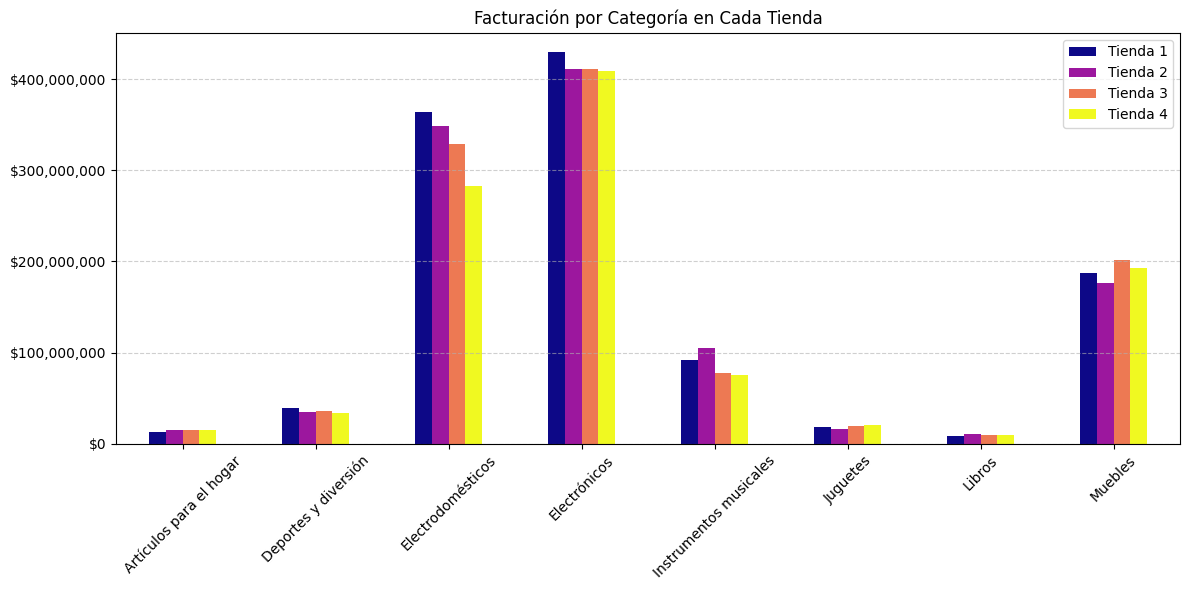

In [7]:
#Crear gráfico de barras agrupadas
ax = facturacion_por_categoria.plot(kind='bar', figsize=(12, 6), colormap='plasma')

# Añadir título y etiquetas
plt.title('Facturación por Categoría en Cada Tienda')
ax.set_xlabel('')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Formatear los valores en el eje Y con comas
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'${x:,.0f}'))

# Ajustar la disposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Al analizar las facturaciones por categoría de productos, podemos observar que Electronica es la categoría que genera más ingresos a las tiendas. Las dos categorías que menos generan en ingresos, son Libros y Artículos para el hogar.

# 3. Calificación promedio de la tienda


In [8]:
tiendas = {'Tienda 1': tienda1,
           'Tienda 2': tienda2,
           'Tienda 3': tienda3,
           'Tienda 4': tienda4}

# Calcular la calificación promedio de cada tienda
calificaciones_promedio = {}

for nombre, df in tiendas.items():
    calificacion_promedio = df['Calificación'].mean()
    calificaciones_promedio[nombre] = calificacion_promedio
    #Calificación promedio en Tienda
    print(f"Calificación promedio en {nombre}: {calificacion_promedio:.4f}")

Calificación promedio en Tienda 1: 3.9767
Calificación promedio en Tienda 2: 4.0373
Calificación promedio en Tienda 3: 4.0483
Calificación promedio en Tienda 4: 3.9958


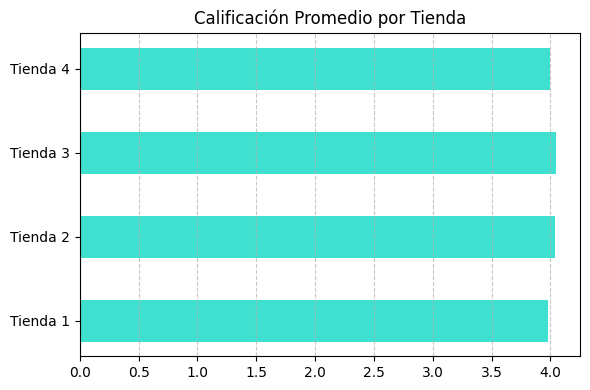

In [9]:
# Gráfico de barras horizontales para mostrar la calificación promedio por tienda
plt.figure(figsize=(6, 4))
plt.barh(list(calificaciones_promedio.keys()), list(calificaciones_promedio.values()), color='turquoise', height=0.5)

# Añadir título
plt.title('Calificación Promedio por Tienda')

# Quitar las etiquetas de los ejes
plt.xlabel('')
plt.ylabel('')

# Añadir la grilla
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Ajustar la disposición
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Dado el siguiente analisis de las calificaciones por tienda se muestra que:

- Tienda 3 tiene la calificación más alta promedio, con un 4.05
- La tienda 2, sigue en segunda lugar con una califiaciones de 4.04
- Tienda 4 cuenta con una calificación promedio de 4
- Tienda 1, tiene la califiación promnedio más baja con un 3.98

# 4. Productos más y menos vendidos

In [10]:
# Diccionario con las tiendas
tiendas = {
    'Tienda 1': tienda1,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Mostrar ventas por categoría, categoría más y menos vendida en cada tienda
for nombre, df in tiendas.items():
    ventas_categoria = df['Categoría del Producto'].value_counts()
    total_ventas = ventas_categoria.sum()  # Total de productos vendidos

    print(f"\nVentas por categoría en {nombre}:\n{ventas_categoria}")

    categoria_mas_vendida = ventas_categoria.idxmax()
    ventas_max = ventas_categoria.max()

    categoria_menos_vendida = ventas_categoria.idxmin()
    ventas_min = ventas_categoria.min()

    print(f"Categoría más vendida: {categoria_mas_vendida} ({ventas_max} ventas)")
    print(f"Categoría menos vendida: {categoria_menos_vendida} ({ventas_min} ventas)")
    print(f"Total de productos vendidos: {total_ventas} productos")

# Tabla resumen con ventas por categoría en cada tienda
ventas_por_categoria = pd.DataFrame({
    'Tienda 1': tienda1['Categoría del Producto'].value_counts(),
    'Tienda 2': tienda2['Categoría del Producto'].value_counts(),
    'Tienda 3': tienda3['Categoría del Producto'].value_counts(),
    'Tienda 4': tienda4['Categoría del Producto'].value_counts()
}).fillna(0)




Ventas por categoría en Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64
Categoría más vendida: Muebles (465 ventas)
Categoría menos vendida: Artículos para el hogar (171 ventas)
Total de productos vendidos: 2359 productos

Ventas por categoría en Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64
Categoría más vendida: Muebles (442 ventas)
Categoría menos vendida: Artículos para el hogar (181 ventas)
Total de productos vendidos: 2359 productos

Ventas por categoría en Tienda 3:
C

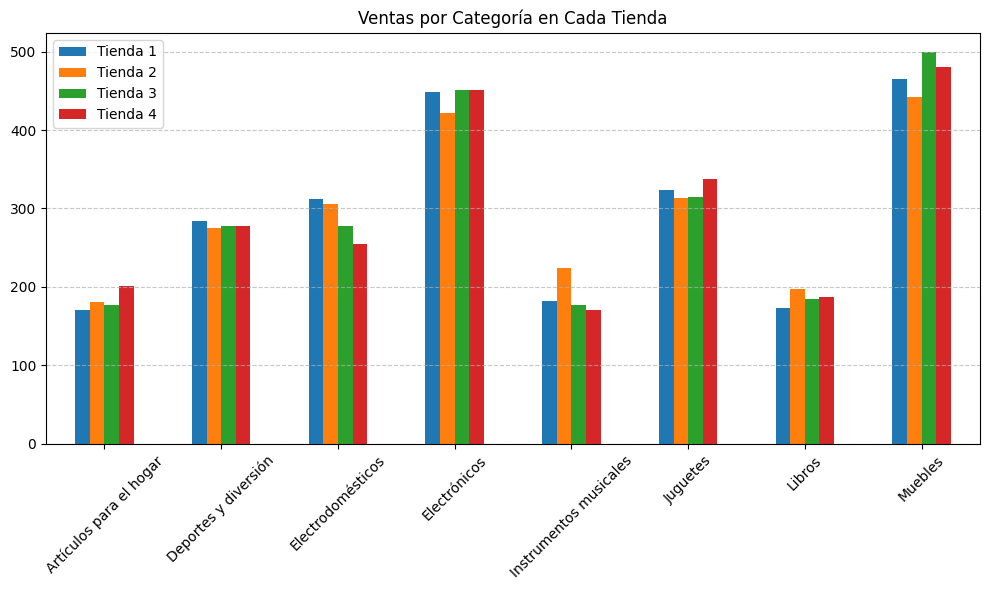

In [11]:
# Gráfico de barras agrupadas
ax = ventas_por_categoria.plot(kind='bar', figsize=(10, 6))  # Guarda en 'ax'
plt.title('Ventas por Categoría en Cada Tienda')
ax.set_xlabel('')  # Esto ahora sí funciona porque 'ax' está definido correctamente
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Viendo los datos mostrados, podemos decir que los productos electronicos y muebles, son las categorías mas vendidas en todas las tiendas. Articulos para el hogar e Instrumentos musicales son los menos vendidos.

# 5. Envío promedio por tienda

In [12]:
tiendas = {
    'Tienda 1': tienda1,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

costo_envio_promedio = {}

for nombre, df in tiendas.items():
    promedio = df['Costo de envío'].mean()
    costo_envio_promedio[nombre] = promedio
    # Mostrar costo de envío promedio de la tienda
    print(f"Costo de envío promedio en {nombre}: ${promedio:,.2f}")

Costo de envío promedio en Tienda 1: $26,018.61
Costo de envío promedio en Tienda 2: $25,216.24
Costo de envío promedio en Tienda 3: $24,805.68
Costo de envío promedio en Tienda 4: $23,459.46


In [13]:
costo_envio_total = {}

for nombre, df in tiendas.items():
    total = df['Costo de envío'].sum()
    costo_envio_total[nombre] = total
    print(f"Costo de envío total en {nombre}: ${total:,.2f}")

Costo de envío total en Tienda 1: $61,377,900.00
Costo de envío total en Tienda 2: $59,485,100.00
Costo de envío total en Tienda 3: $58,516,600.00
Costo de envío total en Tienda 4: $55,317,400.00


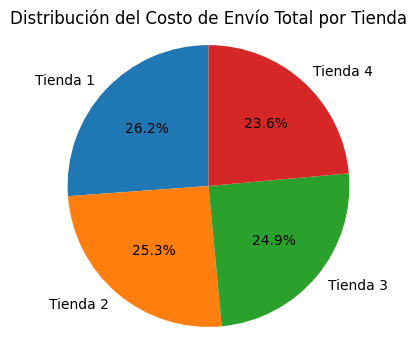

In [14]:
# Crear el gráfico de torta
plt.figure(figsize=(4, 4))
plt.pie(costo_envio_total.values(), labels=costo_envio_total.keys(), autopct='%1.1f%%', startangle=90)
plt.title('Distribución del Costo de Envío Total por Tienda')
plt.axis('equal')  # Para que el gráfico de torta sea circular
plt.show()

Podemos observar en los datos, que la no hay mucha diferencia en el costo de los envios entre las tiendas, sin embergo, la Tienda 1 es la que más ingresos tiene, pero su costo de envio promedio es el más alto.

  **Índice de eficiencia**

En este apartado, vamos a calcular la eficiencia de cada tienda, tomando los ingresos y el costo de envio.

Esto nos servirá para aconsejar al Sr. Juan en su toma de decisión

El índice de eficiencia se calcula con la siguiente fórmula:

                Indice de eficiencia = Ventas Totales/Costo de Envio Total


In [15]:

# Calcular el índice de eficiencia
indice_eficiencia = {}
for nombre in costo_envio_total:
    ventas = facturaciones.get(nombre, 0)
    costo_envio = costo_envio_total[nombre]
    indice_eficiencia[nombre] = ventas / costo_envio if costo_envio != 0 else 0

# Imprimir el índice de eficiencia por tienda
for nombre, indice in indice_eficiencia.items():
    print(f"Índice de eficiencia de {nombre}: {indice:.2f}")

# Identificar la tienda con el peor rendimiento (índice más bajo)
tienda_peor = min(indice_eficiencia, key=indice_eficiencia.get)

print(f"\nLa tienda con el indice de ediciencia mas bajo es: {tienda_peor}")

Índice de eficiencia de Tienda 1: 18.75
Índice de eficiencia de Tienda 2: 18.77
Índice de eficiencia de Tienda 3: 18.76
Índice de eficiencia de Tienda 4: 18.77

La tienda con el indice de ediciencia mas bajo es: Tienda 1


La Tienda 1 tiene el índice de eficiencia más bajo, lo que significa que, en proporción, a pesar de que es la tienda que genera más ingresos de las 4.

Sin embargo, la diferencia con las demás tiendas es mínima (menos de 0.02 puntos), por lo tanto, no es una señal fuerte por sí sola para tomar una decisión drástica como cerrar o vender la tienda.


# ANALISI DESEMPEÑO GEOGRAFICO

In [16]:
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Unimos todas las tiendas en un solo DataFrame
df_tiendas = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# se asegura que no haya valores nulos en lat/lon
df_tiendas = df_tiendas.dropna(subset=['lat', 'lon'])

# Crear mapa centrado en el promedio de coordenadas
m = folium.Map(location=[df_tiendas['lat'].mean(), df_tiendas['lon'].mean()], zoom_start=6)

# Crear datos para el mapa de calor (lat, lon, intensidad = precio de venta)
heat_data = [[row['lat'], row['lon'], row['Precio']] for index, row in df_tiendas.iterrows()]

# Añadir el mapa de calor
HeatMap(heat_data, radius=13).add_to(m)

# Mostrar el mapa
m

CIUDADES QUE GENERAN MÁS INGRESOS:

In [17]:
# Agrupar las ventas por ciudad y tienda
ventas_por_ciudad_tienda = df_tiendas.groupby(['Lugar de Compra', 'Tienda'])['Precio'].sum().unstack(fill_value=0)

# Sumar las ventas por ciudad (por todas las tiendas)
ventas_por_ciudad_total = ventas_por_ciudad_tienda.sum(axis=1)

# Ordenar por ventas totales de mayor a menor
ventas_por_ciudad_tienda_ordenado = ventas_por_ciudad_tienda.loc[ventas_por_ciudad_total.sort_values(ascending=False).index]

# Formatear los números para eliminar la notación científica usando apply en lugar de applymap
ventas_por_ciudad_tienda_ordenado_formateado = ventas_por_ciudad_tienda_ordenado.apply(lambda col: col.map(lambda x: f'{x:,.2f}'))

# Mostrar el DataFrame con las ventas ordenadas por ciudad y sin notación científica
print(ventas_por_ciudad_tienda_ordenado_formateado)

Tienda                 Tienda 1        Tienda 2        Tienda 3  \
Lugar de Compra                                                   
Bogotá           440,005,000.00  479,959,200.00  475,562,100.00   
Medellín         296,858,100.00  297,246,700.00  250,580,600.00   
Cali             154,493,700.00  118,257,600.00  109,287,600.00   
Pereira           56,214,300.00   43,073,800.00   62,504,500.00   
Barranquilla      32,907,700.00   27,741,300.00   36,768,500.00   
Cartagena         22,296,700.00   21,548,300.00   34,144,100.00   
Cúcuta            37,879,500.00   28,991,500.00   25,165,500.00   
Bucaramanga       17,579,200.00   23,895,600.00   23,538,900.00   
Riohacha          18,512,700.00   12,656,400.00   19,025,900.00   
Leticia           14,669,800.00   16,159,000.00   19,212,800.00   
Santa Marta       13,198,300.00   13,829,300.00   12,854,300.00   
Pasto             14,996,400.00   12,800,100.00    6,801,300.00   
Neiva              3,494,000.00    3,839,400.00    4,359,500.0

Como se puede evidenciar las ciudades más grandes de colombia, son las que más ingresos generan. Esto es común dado que en las ciudades mas grandes hay mas consumidores, hay mas ingresos , y por lo tanto, permiten un mayor consumo.

**TABLA COMPARATIVA DE TIENDAS**

In [18]:
def resumen_tienda(nombre, df):
    facturacion = df["Precio"].sum()
    # Access the 'Calificación' column instead of 'calificacion_promedio'
    calif = df["Calificación"].mean()
    envio = df["Costo de envío"].mean()

    mas_v = df.groupby("Producto")["Categoría del Producto"].sum().sort_values(ascending=False)
    mas_vendido = mas_v.index[0]
    mas_v_cant = mas_v.values[0]

    return {
        "Tienda": nombre,
        "Facturación Total": round(facturacion, 2),
        "Calificación Promedio": round(calif, 2),
        "Envío Promedio": round(envio, 2),
        "Producto Más Vendido": f"{mas_vendido} ({mas_v_cant})"
    }

# Crear resumen
resumen = [
    resumen_tienda("Tienda 1", tienda1),
    resumen_tienda("Tienda 2", tienda2),
    resumen_tienda("Tienda 3", tienda3),
    resumen_tienda("Tienda 4", tienda4),
]

 # Mostrar tabla
resumen_df = pd.DataFrame(resumen)
display(resumen_df)

# Recomendación automática
mejor_fact = resumen_df.loc[resumen_df["Facturación Total"].idxmax()]
mejor_calif = resumen_df.loc[resumen_df["Calificación Promedio"].idxmax()]

if mejor_fact["Tienda"] == mejor_calif["Tienda"]:
    recomendacion = f"✅ Se recomienda que el Sr. Juan venda en **{mejor_fact['Tienda']}** porque tiene la **mayor facturación** (${mejor_fact['Facturación Total']}) y también la **mejor calificación promedio** ({mejor_fact['Calificación Promedio']})."
else:
    recomendacion = (
        f"📌 La **{mejor_fact['Tienda']}** tiene la mayor facturación (${mejor_fact['Facturación Total']}), "
        f"pero la **{mejor_calif['Tienda']}** tiene la mejor calificación ({mejor_calif['Calificación Promedio']}).\n\n"
        f"👉 Si el Sr. Juan busca **ganancias**, elija *{mejor_fact['Tienda']}*.\n"
        f"👉 Si busca **reputación y experiencia del cliente**, elija *{mejor_calif['Tienda']}*."
    )
    print(recomendacion)

,Tienda,Facturación Total,Calificación Promedio,Envío Promedio,Producto Más Vendido
0,Tienda 1,1.150880e+09,3.98,26018.61,Armario (MueblesMueblesMueblesMueblesMueblesMu...
1,Tienda 2,1.116344e+09,4.04,25216.24,Armario (MueblesMueblesMueblesMueblesMueblesMu...
2,Tienda 3,1.098020e+09,4.05,24805.68,Kit de bancas (MueblesMueblesMueblesMueblesMue...
3,Tienda 4,1.038376e+09,4.00,23459.46,Cama box (MueblesMueblesMueblesMueblesMueblesM...


📌 La **Tienda 1** tiene la mayor facturación ($1150880400.0), pero la **Tienda 3** tiene la mejor calificación (4.05).

👉 Si el Sr. Juan busca **ganancias**, elija *Tienda 1*.
👉 Si busca **reputación y experiencia del cliente**, elija *Tienda 3*.


from matplotlib import pyplot as plt
resumen_df['Facturación Total'].plot(kind='hist', bins=20, title='Facturación Total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
resumen_df['Calificación Promedio'].plot(kind='hist', bins=20, title='Calificación Promedio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
resumen_df['Envío Promedio'].plot(kind='hist', bins=20, title='Envío Promedio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
resumen_df.groupby('Tienda').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
resumen_df.groupby('Producto Más Vendido').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
resumen_df.plot(kind='scatter', x='Facturación Total', y='Calificación Promedio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
resumen_df.plot(kind='scatter', x='Calificación Promedio', y='Envío Promedio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
resumen_df['Facturación Total'].plot(kind='line', figsize=(8, 4), title='Facturación Total')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
resumen_df['Calificación Promedio'].plot(kind='line', figsize=(8, 4), title='Calificación Promedio')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
resumen_df['Envío Promedio'].plot(kind='line', figsize=(8, 4), title='Envío Promedio')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Producto Más Vendido'].value_counts()
    for x_label, grp in resumen_df.groupby('Tienda')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Tienda')
_ = plt.ylabel('Producto Más Vendido')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(resumen_df['Tienda'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(resumen_df, x='Facturación Total', y='Tienda', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(resumen_df['Producto Más Vendido'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(resumen_df, x='Facturación Total', y='Producto Más Vendido', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(resumen_df['Tienda'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(resumen_df, x='Calificación Promedio', y='Tienda', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(resumen_df['Producto Más Vendido'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(resumen_df, x='Calificación Promedio', y='Producto Más Vendido', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)